In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv("C:/Users/mishu/Documents/NCI/PROGRAMMING FOR AI/CA1.1/iris.csv")

In [49]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
dg = pd.read_csv("C:/Users/mishu/Documents/NCI/PROGRAMMING FOR AI/CA1.1/irisdata.csv")

print(dg)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [59]:
# Number of data points
num_data_points = df.shape[0]
print(f"\nNumber of data points: {num_data_points}")

# Data types of the column
column_data_types = df.dtypes
print(f"\nData types of the column: {column_data_types}")

# Names of the columns
column_names = df.columns.tolist()
print(f"\nNames of the columns: {column_names}")

# Number of unique flower species
num_flower_species = df['species'].nunique()
print(f"\nNumber of unique flower species: {num_flower_species}")

# Count of each flower species
species_counts = df['species'].value_counts()
print(f"\nSpecies counts: {species_counts}")


Number of data points: 150

Data types of the column: sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species            object
petal_relation    float64
sepal_relation    float64
dtype: object

Names of the columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'petal_relation', 'sepal_relation']

Number of unique flower species: 3

Species counts: species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [52]:
# Error correction
df.loc[34, 'sepal_length'] = 4.9
df.loc[34, 'sepal_width'] = 3.1
df.loc[34, 'petal_length'] = 1.5
df.loc[34, 'petal_width'] = 0.2
df.loc[34, 'species'] = "setosa"

df.loc[37, 'sepal_length'] = 4.9
df.loc[37, 'sepal_width'] = 3.6
df.loc[37, 'petal_length'] = 1.4
df.loc[37, 'petal_width'] = 0.1
df.loc[37, 'species'] = "setosa"

# Confirmation of changes
print("\nRow 35 corrected:")
print(df.loc[34])

print("\nRow 38 corrected:")
print(df.loc[37])


Row 35 corrected:
sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 34, dtype: object

Row 38 corrected:
sepal_length       4.9
sepal_width        3.6
petal_length       1.4
petal_width        0.1
species         setosa
Name: 37, dtype: object


In [ ]:
# Error correction
df.loc[34, 'sepal_length'] = 4.9
df.loc[34, 'sepal_width'] = 3.1
df.loc[34, 'petal_length'] = 1.5
df.loc[34, 'petal_width'] = 0.2
df.loc[34, 'species'] = "setosa"

df.loc[37, 'sepal_length'] = 4.9
df.loc[37, 'sepal_width'] = 3.6
df.loc[37, 'petal_length'] = 1.4
df.loc[37, 'petal_width'] = 0.1
df.loc[37, 'species'] = "setosa"

# Add new features
df['petal_relation'] = df['petal_length'] / df['petal_width']
df['sepal_relation'] = df['sepal_length'] / df['sepal_width']

# Save the modified DataSet
df.to_csv("iris_corrected.csv", index=False)

In [54]:
# Calculate the correlation between all pairs of numeric columns
corr_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_relation', 'sepal_relation']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Initialize variables to track the maximum and minimum correlations
max_corr = 0    # Initialize max_corr to 0
min_corr = 1    # Initialize min_corr to 1 (since correlation range from -1 to 1)
max_corr_columns = None     # Initialize max_corr_columns to None
min_corr_columns = None     # Initialize min_corr_columns to None

# Iterate over the upper triangle of the correlation matrix to find the maximun and minimum correlations
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        # Check if the absolute value of the current correlations is greater than the man_corr
        if abs(corr_matrix.iloc[i, j]) > max_corr:
            max_corr = abs(corr_matrix.iloc[i, j])      # Update max_corr
            max_corr_columns = (corr_matrix.columns[i], corr_matrix.columns[j])     # Update max_corr_columns
        # Check if the absolute value of the current correlations is less than the min_corr
        if abs(corr_matrix.iloc[i, j]) < min_corr:
            min_corr = abs(corr_matrix.iloc[i, j])      # Update min_corr
            min_corr_columns = (corr_matrix.columns[i], corr_matrix.columns[j])     # Update min_corr_columns

# Print the maximun and minimum correlations
print(f"\nHighest Positive Correlation: {max_corr} between {max_corr_columns}")
print(f"\nHighest Negative Correlation: {-min_corr} between {min_corr_columns}")

Correlation Matrix:
                sepal_length  sepal_width  petal_length  petal_width  \
sepal_length        1.000000    -0.117570      0.871754     0.817941   
sepal_width        -0.117570     1.000000     -0.428440    -0.366126   
petal_length        0.871754    -0.428440      1.000000     0.962865   
petal_width         0.817941    -0.366126      0.962865     1.000000   
petal_relation     -0.573856     0.367547     -0.700366    -0.748906   
sepal_relation      0.729917    -0.748133      0.837733     0.753767   

                petal_relation  sepal_relation  
sepal_length         -0.573856        0.729917  
sepal_width           0.367547       -0.748133  
petal_length         -0.700366        0.837733  
petal_width          -0.748906        0.753767  
petal_relation        1.000000       -0.611992  
sepal_relation       -0.611992        1.000000  

Highest Positive Correlation: 0.962865431402796 between ('petal_length', 'petal_width')

Highest Negative Correlation: -0.117569784

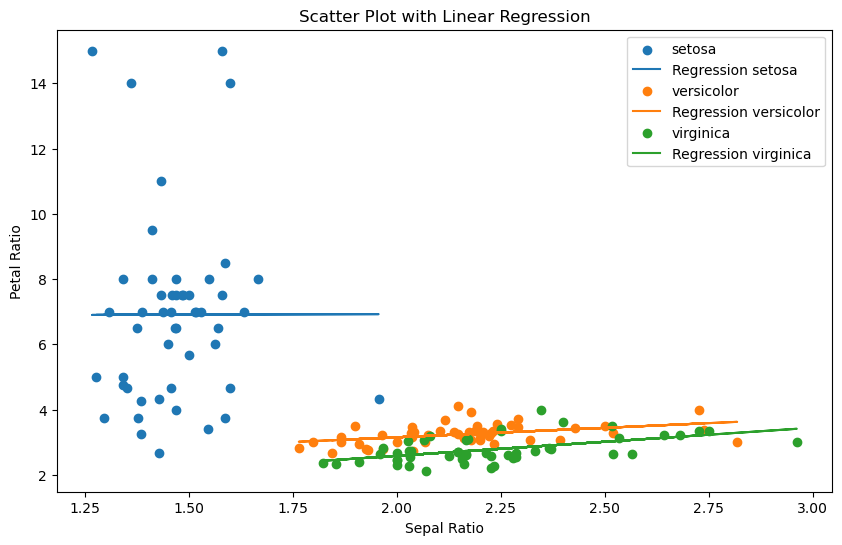

In [55]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
# Iterate over each unique species in the 'species' column
for species in df['species'].unique():
    # Filter the DataFrame to include only rows where the 'species' column matches the current species
    df_species = df[df['species'] == species]
    # Create a scatter plot of 'sepal_relation' vs 'petal_relation' for the current species
    plt.scatter(df_species['sepal_relation'], df_species['petal_relation'], label=species)

    # Add a linear regression line for each species
    X = df_species[['sepal_relation']]
    y = df_species['petal_relation']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(df_species['sepal_relation'], y_pred, label=f'Regression {species}')

# Graphic sets
plt.xlabel('Sepal Ratio')
plt.ylabel('Petal Ratio')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.savefig('Iris_Scatter_with_Regression.pdf')
plt.show()

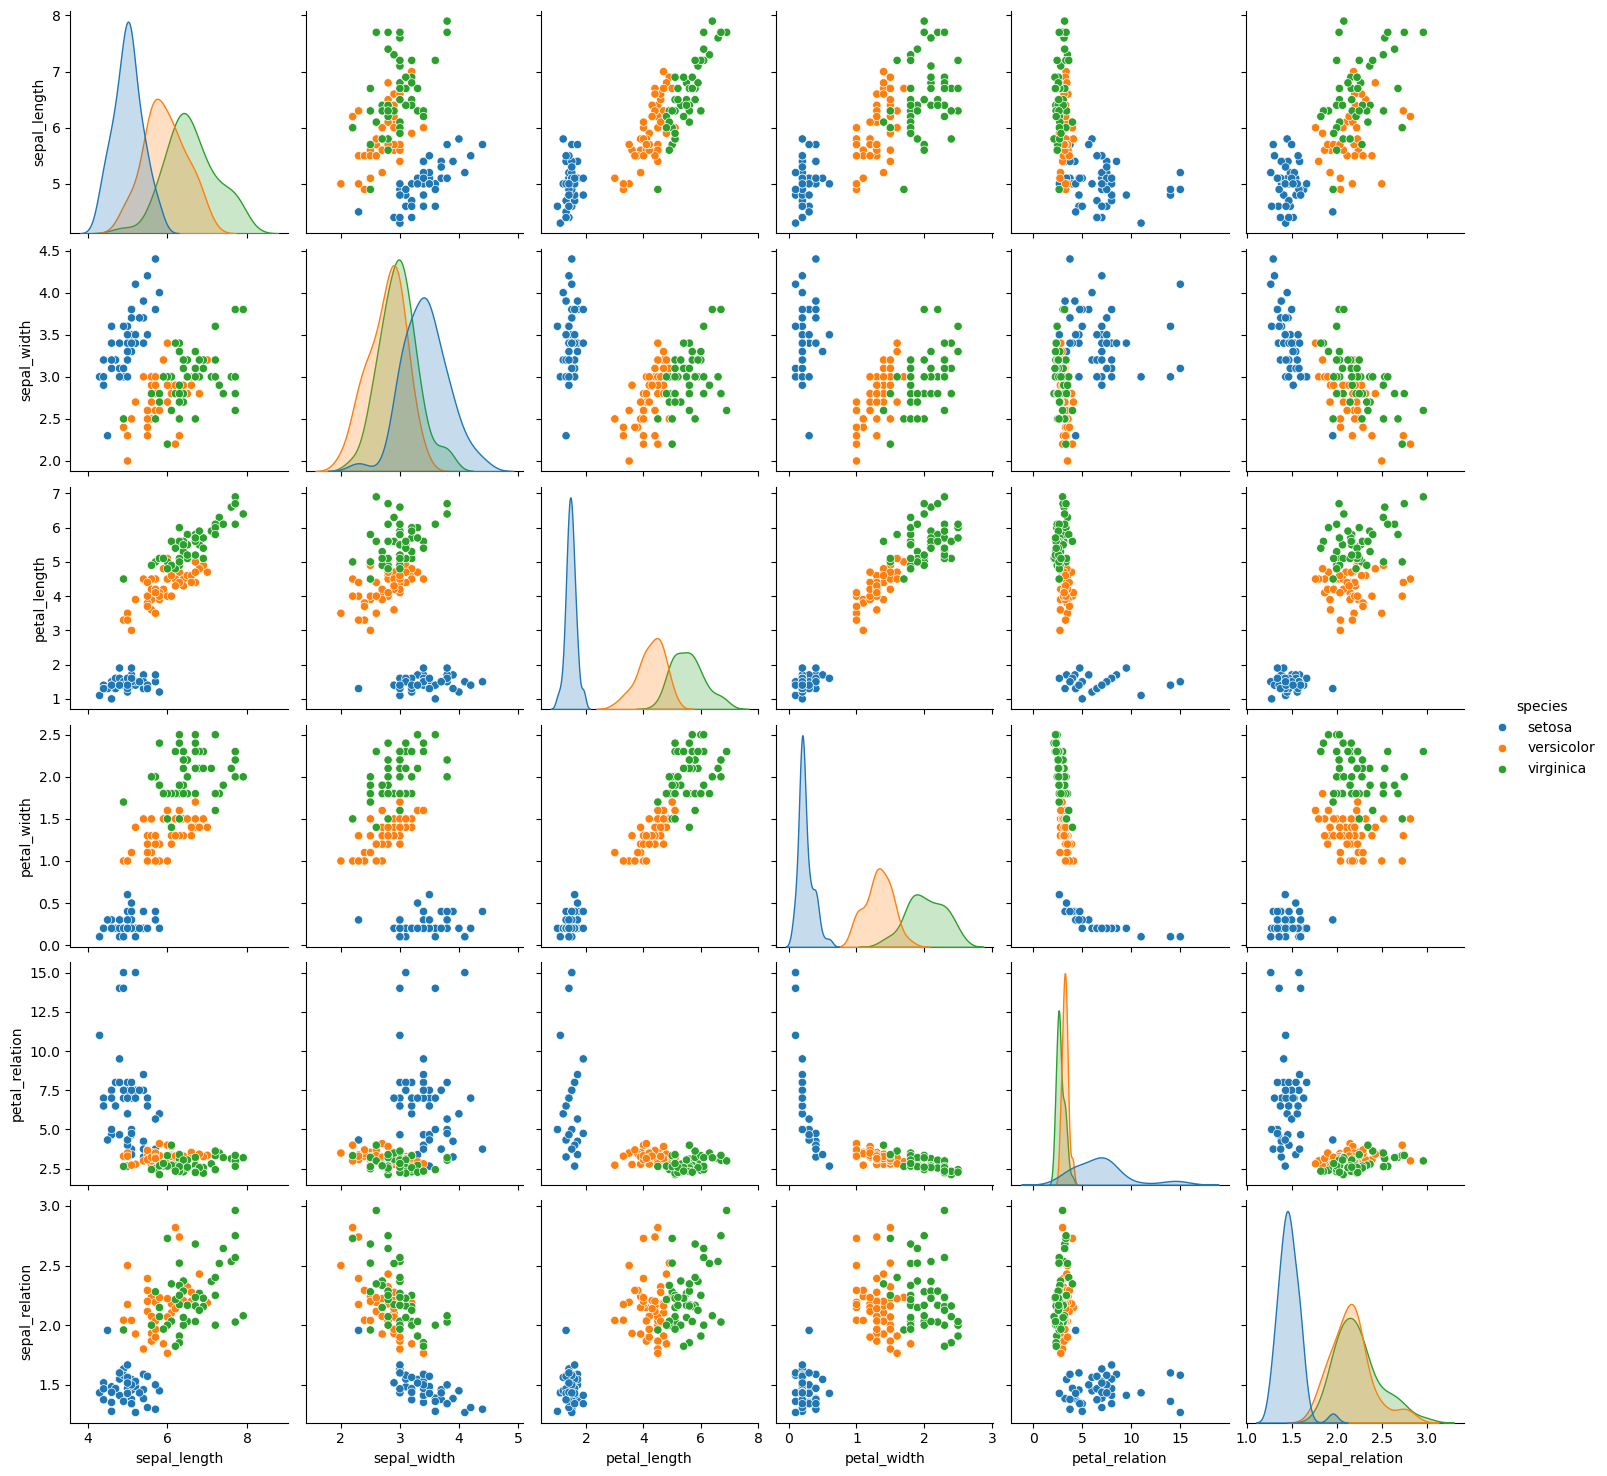

In [56]:
# Create a pair plot
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_relation', 'sepal_relation'], hue='species')
plt.show()